In [27]:
import pickle
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [28]:
def load(path):
    obj= pickle.load(open(path,'rb'))
    return obj

In [29]:
train_dir = os.path.join('dataset/cats_and_dogs_filtered/train')

In [30]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=(160,160))

Found 2000 files belonging to 2 classes.


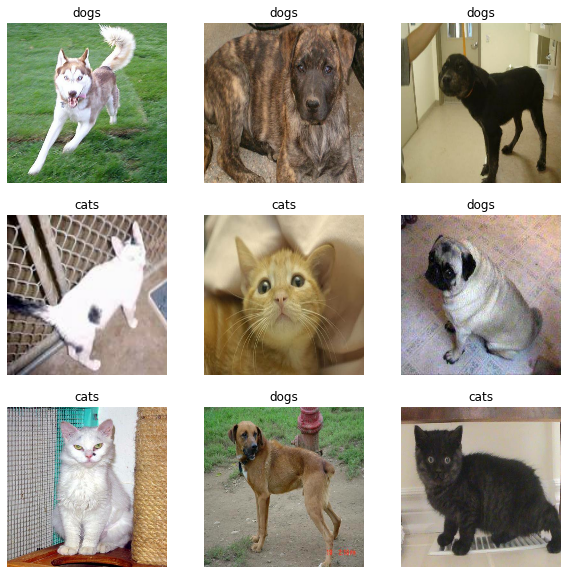

In [31]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
def preprocessing_model():
    model = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal_and_vertical" ),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        ])
    return model

In [33]:
data_augmentation = preprocessing_model()

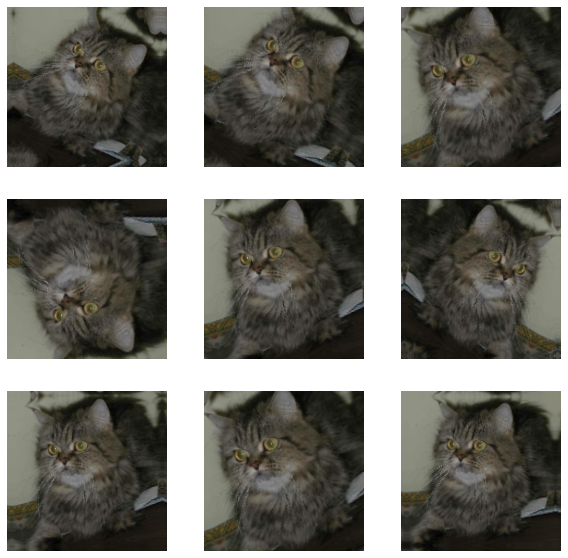

In [34]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [35]:
history=load("artefacts/history.pickle")

In [36]:
def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    

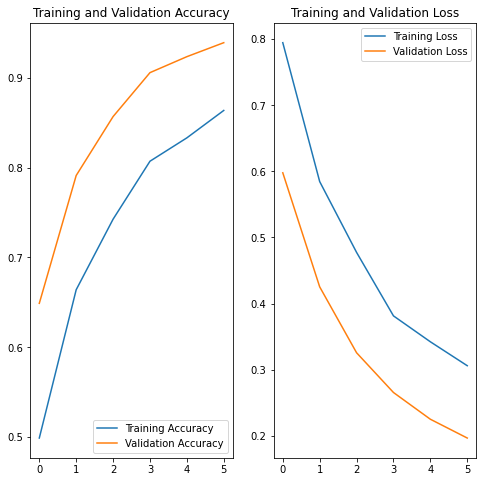

In [37]:
plot_history(history)

In [41]:
test_dir =os.path.join('dataset/cats_and_dogs_filtered/test')
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=(160,160))
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Found 100 files belonging to 2 classes.


In [39]:
model=tf.keras.models.load_model("artefacts/model.h5")

2022-04-18 22:33:49.645651: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 78643200 exceeds 10% of free system memory.


Predictions:
 [0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1]
Labels:
 [0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1]


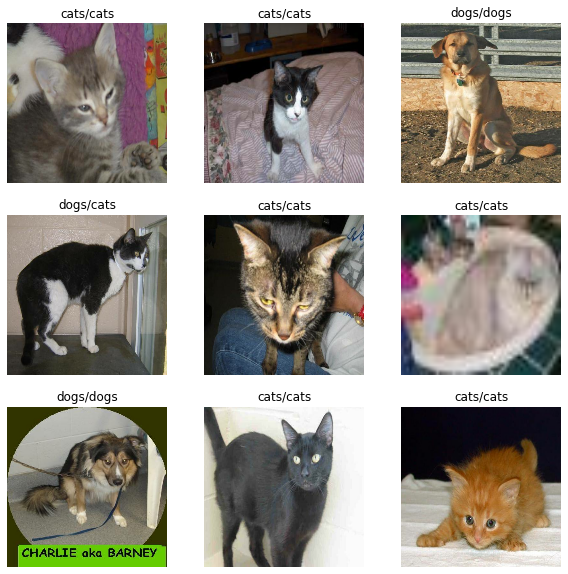

In [43]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(f"{class_names[predictions[i]]}/{class_names[label_batch[i]]}")
  plt.axis("off")